In [22]:
import csv
import time
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def load_csv(filename):
    with open(filename, mode='r') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader)  # Skip the header
        data = list(zip(*csv_reader))  # Transpose rows to columns
    return {header[i]: list(map(float, data[i])) for i in range(len(header))}

# Load data from each file
data1 = load_csv('OPID.csv')
timeIMU, yaw, yawPWM = data1["Time"], data1["Yaw"], data1["YawPWM"]

data2 = load_csv('Dist.csv')
timeToF, distanceF = data2["Time"], data2["Distance"]

data3 = load_csv('LPID.csv')
timePID, PIDoutput = data3["Time"], data3["DistPWM"]

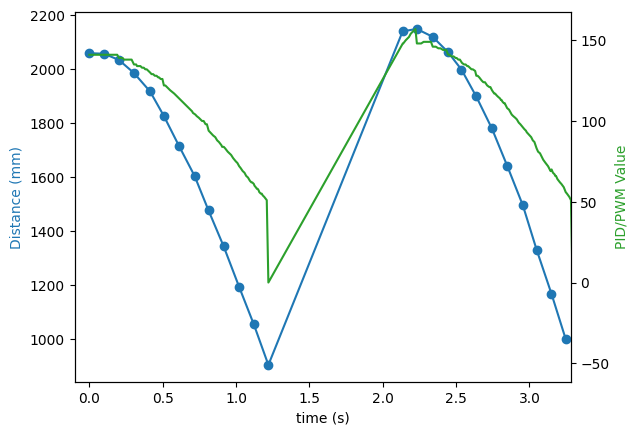

In [49]:
fig, ax1 = plt.subplots() 
plt.xlim([-0.1,3.28])
color = 'tab:blue'
ax1.set_xlabel('time (s)') 
ax1.set_ylabel('Distance (mm)', color = color) 
ax1.scatter(np.array(timeToF)-timeToF[0], distanceF, color=color)
ax1.plot(np.array(timeToF)-timeToF[0], distanceF, color=color)
ax2 = ax1.twinx() 
color = 'tab:green'
ax2.set_ylabel('PID/PWM Value', color = color) 
ax2.plot(np.array(timePID)-timeToF[0], PIDoutput, label = 'PID/PWM Value',color=color)
plt.show();

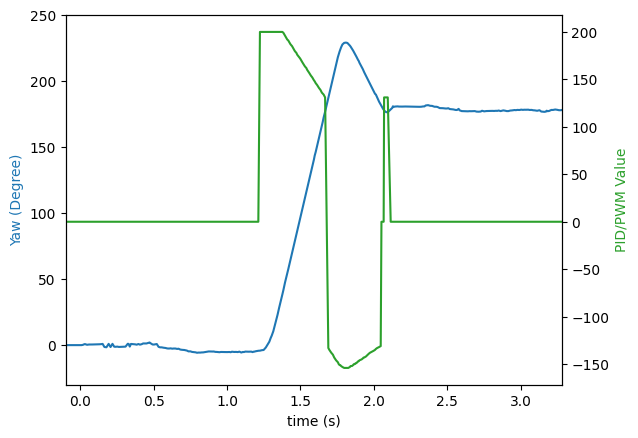

In [51]:
fig, ax1 = plt.subplots() 
plt.xlim([-0.1,3.28])
color = 'tab:blue'
ax1.set_xlabel('time (s)') 
ax1.set_ylabel('Yaw (Degree)', color = color) 
ax1.plot(np.array(timeIMU)-timeToF[0], yaw, color=color)
ax1.set_ylim([-30,250])
ax2 = ax1.twinx() 
color = 'tab:green'
ax2.set_ylabel('PID/PWM Value', color = color) 
ax2.plot(np.array(timeIMU)-timeToF[0], yawPWM, label = 'PID/PWM Value',color=color)
plt.show();

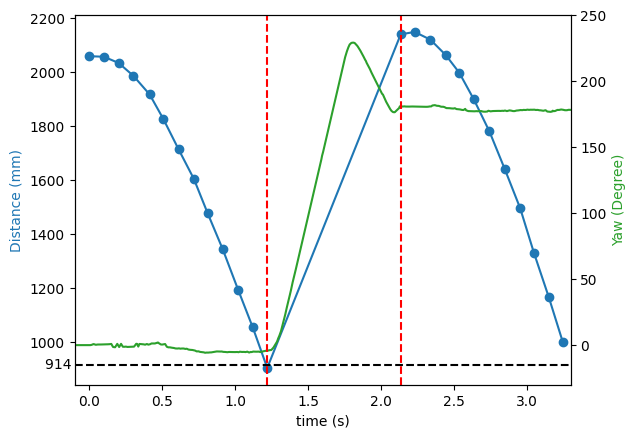

In [44]:
fig, ax1 = plt.subplots() 
plt.xlim([-0.1,3.3])
color = 'tab:blue'
ax1.set_xlabel('time (s)') 
ax1.set_ylabel('Distance (mm)', color = color) 
ax1.scatter(np.array(timeToF)-timeToF[0], distanceF, color=color)
ax1.plot(np.array(timeToF)-timeToF[0], distanceF, color=color)
ax1.axhline(y=914,ls='--',color='k')
ax1.text(0, 900, '914    ', horizontalalignment='right', color='k')
ax2 = ax1.twinx() 
color = 'tab:green'
ax2.set_ylabel('Yaw (Degree)', color = color) 
ax2.plot(np.array(timeIMU)-timeToF[0], yaw,color=color)
ax2.axvline(x=1.221,ls='--',color='r')
ax2.axvline(x=2.136,ls='--',color='r')
ax2.set_ylim([-30,250])
plt.show();

array([0.   , 0.101, 0.202, 0.304, 0.415, 0.508, 0.613, 0.718, 0.813,
       0.916, 1.022, 1.122, 1.221, 2.136, 2.232, 2.34 , 2.445, 2.537,
       2.637, 2.744, 2.848, 2.955, 3.049, 3.15 , 3.247])

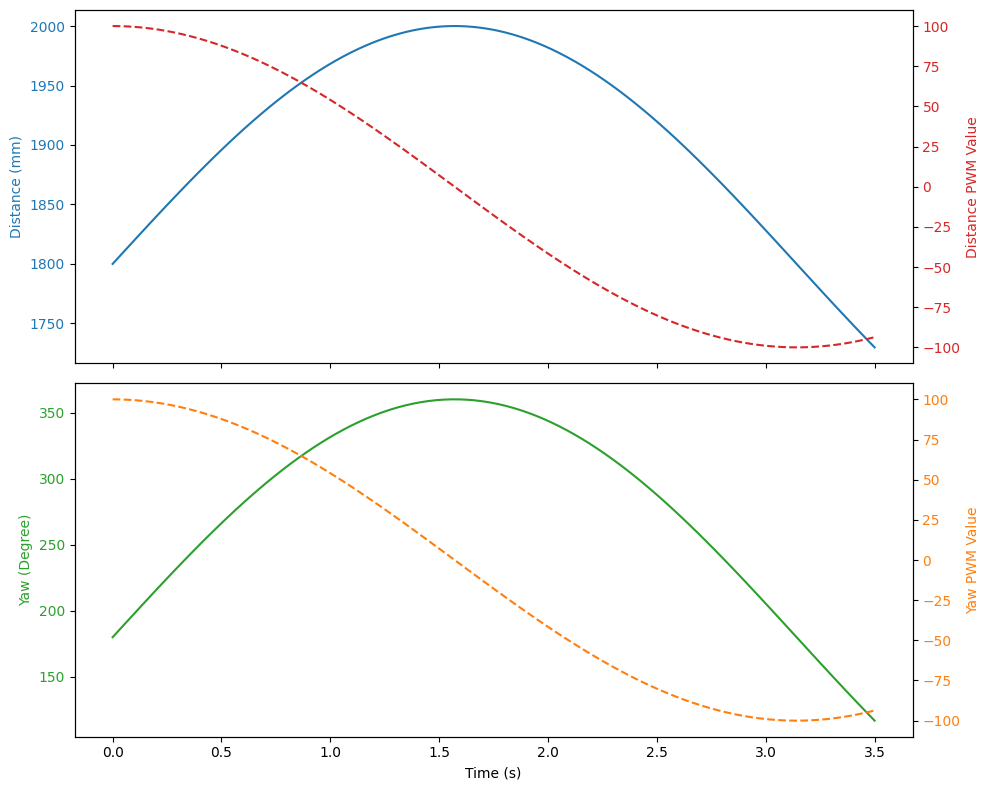

In [18]:

# Example data (replace these with your actual data arrays)
time = np.linspace(0, 3.5, 100)
distance = np.sin(time) * 200 + 1800  # Simulating distance changes
distancePWM = np.cos(time) * 100  # Simulating PWM changes for distance
yaw = np.sin(time) * 180 + 180  # Simulating yaw changes
yawPWM = np.cos(time) * 100  # Simulating PWM changes for yaw

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Distance plot
color = 'tab:blue'
ax1.set_ylabel('Distance (mm)', color=color)
ax1.plot(time, distance, color=color, label='Distance')
ax1.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
color = 'tab:red'
ax3.set_ylabel('Distance PWM Value', color=color)
ax3.plot(time, distancePWM, color=color, linestyle='--', label='Distance PWM')
ax3.tick_params(axis='y', labelcolor=color)

# Yaw plot
color = 'tab:green'
ax2.set_ylabel('Yaw (Degree)', color=color)
ax2.set_xlabel('Time (s)')
ax2.plot(time, yaw, color=color, label='Yaw')
ax2.tick_params(axis='y', labelcolor=color)

ax4 = ax2.twinx()
color = 'tab:orange'
ax4.set_ylabel('Yaw PWM Value', color=color)
ax4.plot(time, yawPWM, color=color, linestyle='--', label='Yaw PWM')
ax4.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()